<a href="https://colab.research.google.com/github/sudhirk999/O4thLab/blob/master/10.%20SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1.0 / (1.0 + np.exp(-(w*x + b)))

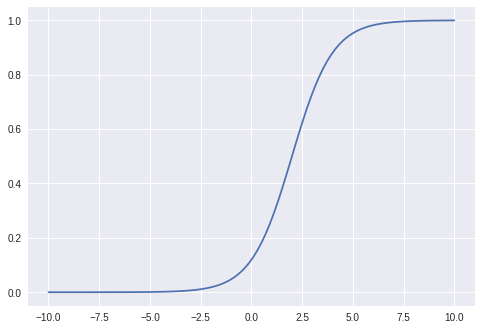

In [0]:
w = 1    #@param {type: "slider", min: -3, max: 3, steps: 0.1}
b = -2    #@param {type: "slider", min: -3, max: 3, steps: 0.01}
X = np.linspace(-10,10,100)
## takes each value of x and compute sigmoid and return it to Y
Y = sigmoid(X, w, b)

plt.plot(X,Y)
plt.show()

# WITH MORE THAN 2 PARAMETERS

$S_{w1,w2,b}(x1,x2) = \frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b))) 

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [0]:
import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

[]

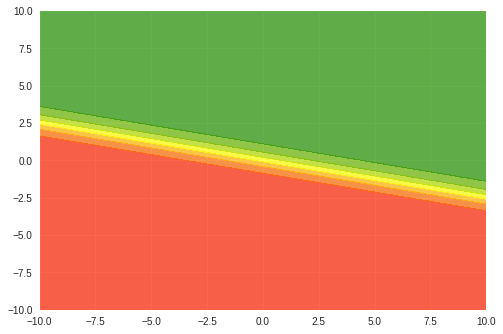

In [0]:
plt.contourf(XX1, XX2, Y, cmap=cmap, alpha=0.7)
plt.plot()

In [0]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'y')

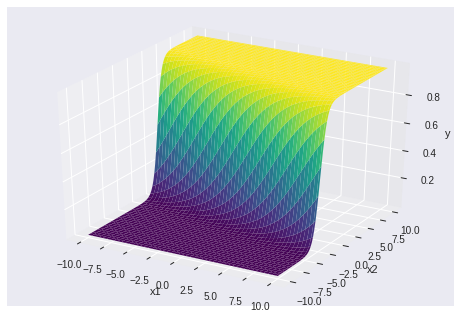

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

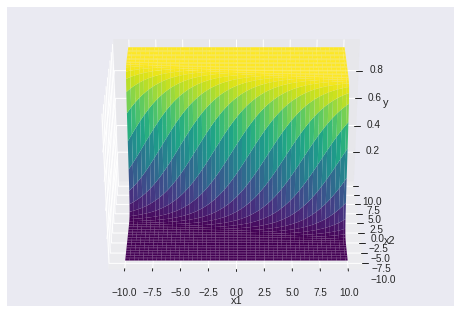

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 270)

In [0]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

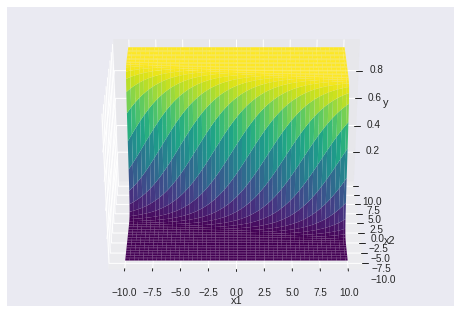

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 270)

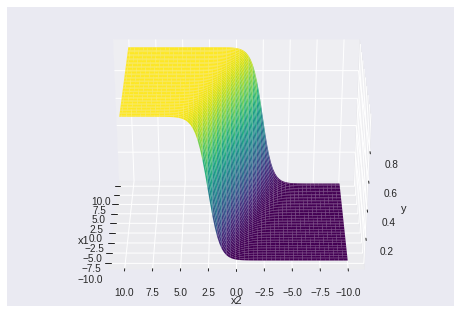

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 180)

# LOSS

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10

Y = sigmoid(X,w_unknown,b_unknown)

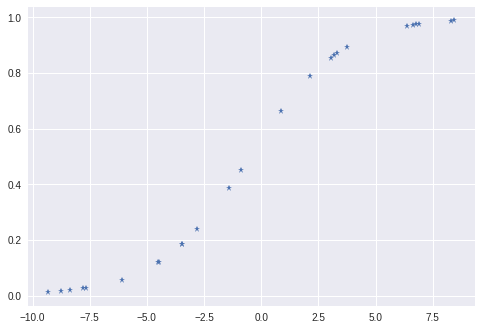

In [0]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def Loss(X, Y, w_a, b_a):
  loss = 0
  for x,y in zip(X,Y):
    y_hat = sigmoid(x, w_a, b_a)
    loss += (y - y_hat)**2
  return loss

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 102)

In [0]:
## Forming Meshgrid (all the combinations of W and B)

WW, BB = np.meshgrid(W,B)

In [0]:
LOSS = np.zeros(WW.shape)

In [0]:
WW.shape

(102, 101)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    LOSS[i, j] = Loss(X, Y, WW[i, j], BB[i, j])

Text(0.5, 0, 'Loss')

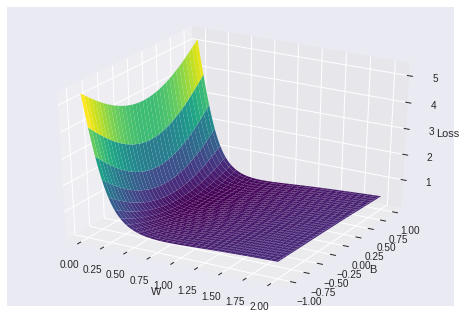

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, LOSS, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

#ax.view_init(30, 180)

In [0]:
## THE MIN LOSS IS NEAR W=0.25

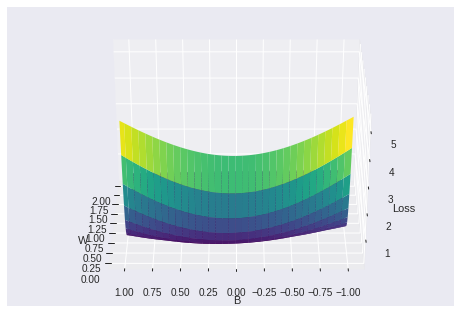

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, LOSS, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

ax.view_init(30, 180)

In [0]:
## THE MINIMUM LOSS IS NEAR B=0.25

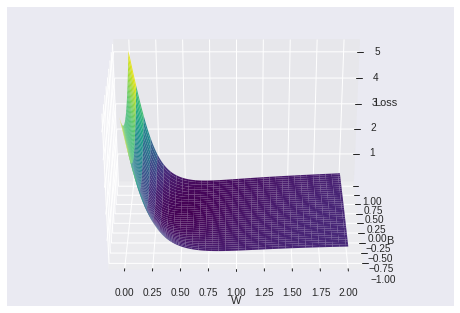

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, LOSS, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [0]:
## FINDING THE MINIMUM LOSS POSITION

In [0]:
ij = np.argmin(LOSS)

In [0]:
i = int(np.floor(ij/LOSS.shape[1]))
j = int(ij - i * LOSS.shape[1])

In [0]:
i

63

In [0]:
j

25

In [0]:
WW[i,j]

0.5

In [0]:
BB[i,j]

0.24752475247524752

## SIGMOID CLASS

In [0]:
class sigmoidNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)

    def fit(self, X, Y, epochs = 1, learning_rate = 1, Learning = True, display_loss=False):
        if Learning:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        
        if display_loss:
          loss = {}
          
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
    
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            
            if display_loss:
              Y_pred = self.sigmoid(self.perceptron(X))
              loss[i] = mean_squared_error(Y_pred, Y)
              
        if display_loss:
          plt.plot(loss.values())
          plt.xlabel('Epochs')
          plt.ylabel('Mean Squared Error')
          plt.show()

    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]
X.shape

(6, 2)

In [0]:
sn = sigmoidNeuron()

In [0]:
YY_matrix = []

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.array([X1[i],X2[j]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  YY_matrix.append(YY)
  ax.contourf(XX1, XX2, YY,cmap=cmap,alpha=0.6)
  ax.scatter(X[:,0], X[:,1], c=Y, cmap=cmap)
  ax.plot()
  


[[0.32266857 0.46913348]] [0.01999681]



[[0.65158373 0.02194457]] [0.03774708]



[[ 0.70717456 -0.42904761]] [-0.00792493]



[[ 0.93748478 -0.14455489]] [-0.05369314]



[[ 0.9397942  -0.45406054]] [-0.11696063]



[[ 1.10048904 -0.25200633]] [-0.16278955]



[[ 1.10726498 -0.45205985]] [-0.21730447]



[[ 1.21071879 -0.3448545 ]] [-0.25628448]



[[ 1.23468549 -0.43998824]] [-0.29782083]



[[ 1.29592153 -0.41176433]] [-0.33087949]



[[ 1.33095646 -0.44490949]] [-0.36332146]



[[ 1.37234386 -0.44982655]] [-0.39216592]



[[ 1.40747992 -0.46378146]] [-0.41928582]



[[ 1.44127362 -0.47403589]] [-0.44440441]



[[ 1.47272351 -0.48430295]] [-0.46789062]



[[ 1.50235401 -0.49384646]] [-0.48988978]



[[ 1.53031496 -0.50286875]] [-0.51056343]



[[ 1.55678174 -0.51140797]] [-0.53004471]



[[ 1.58189938 -0.51951232]] [-0.54844972]



[[ 1.6057936  -0.52722237]] [-0.56587945]



[[ 1.62857373 -0.53457341]] [-0.5824222]



[[ 1.65033538 -0.54159633]] [-0.59815551]



[[ 1.67116265 -0.54831826]] [-0.61314777]



[[ 1.69112984 -0.55476319]] [-0.6274595]



[[ 1.7103029  -0.56095239]] [-0.64114451]



[[ 1.72874064 -0.56690484]] [-0.65425078]



[[ 1.74649569 -0.57263751]] [-0.66682127]



[[ 1.76361533 -0.57816565]] [-0.67889453]



[[ 1.78014217 -0.58350298]] [-0.69050531]



[[ 1.79611477 -0.58866194]] [-0.701685]


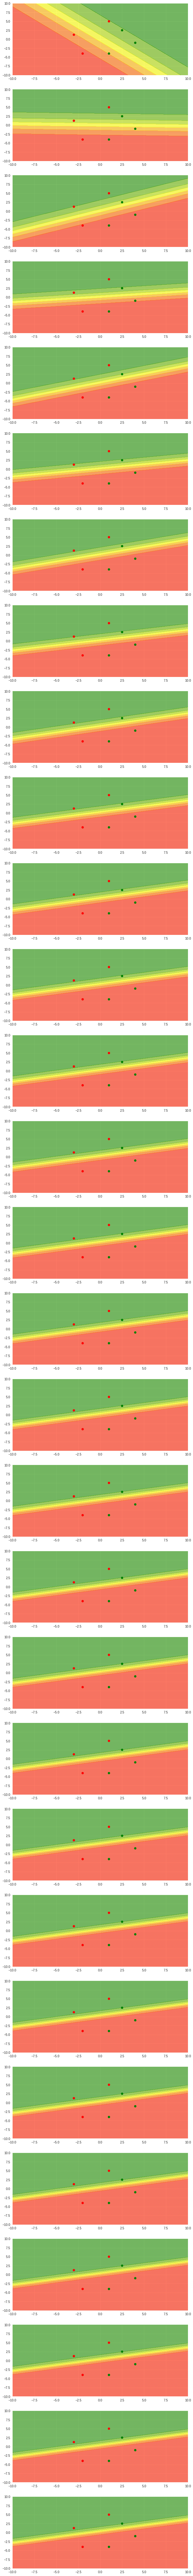

In [0]:
sn.fit(X,Y,1,0.5,True)
N = 30

plt.figure(figsize=(10,N*5))

for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i+1)
  plot_sn(X, Y, sn, ax)
  
  sn.fit(X,Y,1,0.5,False)

In [0]:
YY_matrix

[array([[3.71339027e-04, 4.08239083e-04, 4.48804261e-04, ...,
         7.85008655e-01, 8.00571714e-01, 8.15273284e-01],
        [3.96341425e-04, 4.35724892e-04, 4.79019923e-04, ...,
         7.95805614e-01, 8.10775489e-01, 8.24889383e-01],
        [4.23026531e-04, 4.65060398e-04, 5.11268807e-04, ...,
         8.06194213e-01, 8.20574195e-01, 8.34106765e-01],
        ...,
        [1.71501450e-01, 1.85389823e-01, 2.00131212e-01, ...,
         9.99508765e-01, 9.99553164e-01, 9.99593551e-01],
        [1.80962833e-01, 1.95436660e-01, 2.10770229e-01, ...,
         9.99539751e-01, 9.99581350e-01, 9.99619191e-01],
        [1.90825958e-01, 2.05890353e-01, 2.21817975e-01, ...,
         9.99568783e-01, 9.99607759e-01, 9.99643214e-01]]),
 array([[0.00123243, 0.0012379 , 0.00124339, ..., 0.00189335, 0.00190175,
         0.00191018],
        [0.00140557, 0.00141181, 0.00141807, ..., 0.00215915, 0.00216873,
         0.00217834],
        [0.00160301, 0.00161012, 0.00161726, ..., 0.00246218, 0.00247309,

In [0]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv


--2019-03-10 12:26:06--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/739uo8ebwbic9kb/mobile_cleaned.csv [following]
--2019-03-10 12:26:06--  https://www.dropbox.com/s/raw/739uo8ebwbic9kb/mobile_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc251b168e643afccdbe9d9c34c5.dl.dropboxusercontent.com/cd/0/inline/Ac2pRiCuWrgi21YdhnljboImvE9j4Q6hzhjMdm8jJm4CMhnStDA3hS7WYpvoLHWkW-7pS8_TQ5p4ikbgooElttM4s5QD67SUvVqIAqBkDYUmr9nH6OfK8Y-YtnocfGefoNU/file# [following]
--2019-03-10 12:26:06--  https://uc251b168e643afccdbe9d9c34c5.dl.dropboxusercontent.com/cd/0/inline/Ac2pRiCuWrgi21YdhnljboImvE9j4Q6hzhjMdm8jJm4CMhnStDA3hS7WYpvoLHWkW-7pS8_TQ5p4ikbgooElttM4s5QD67SU

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [0]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [0]:
X = data.drop('Rating', axis=1)

In [0]:
Y = data['Rating'].values

In [0]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [0]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = data['Class'].values

# STANDARDISATION

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised,)

In [0]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [0]:
sc = StandardScaler()

In [0]:
X_scaled_train = sc.fit_transform(X_train)
X_scaled_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
# Scaling the ytrain and ytest

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
minmax_sc = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_sc.fit_transform(Y_train.reshape(-1,1))

In [0]:
Y_scaled_test = minmax_sc.fit_transform(Y_test.reshape(-1,1))

In [0]:
## Scaling the threshold

In [0]:
scaled_threshold = minmax_sc.transform(np.array([threshold]).reshape(-1,1))

In [0]:
scaled_threshold = scaled_threshold[0][0]

In [0]:
scaled_threshold

0.6363636363636365

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype('int').ravel()

In [0]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype('int').ravel()

In [0]:
Y_binarised_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

# Training

In [0]:
sn = sigmoidNeuron()

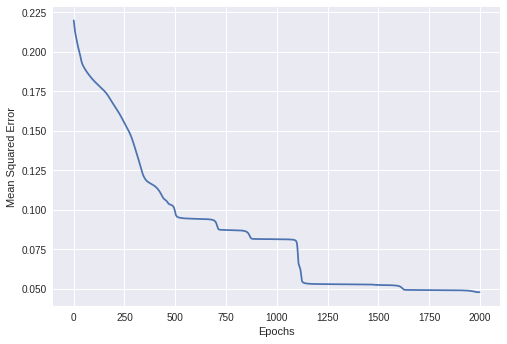

In [0]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.01, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype('int').ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype('int').ravel()

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [0]:
print(accuracy_train, accuracy_test)

0.7764705882352941 0.813953488372093
